In [1]:
# 코랩에서 그래프 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 실행하고 런타임 다시 시작

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ubion_finance/Datasets/newnew_data.csv',index_col=0)

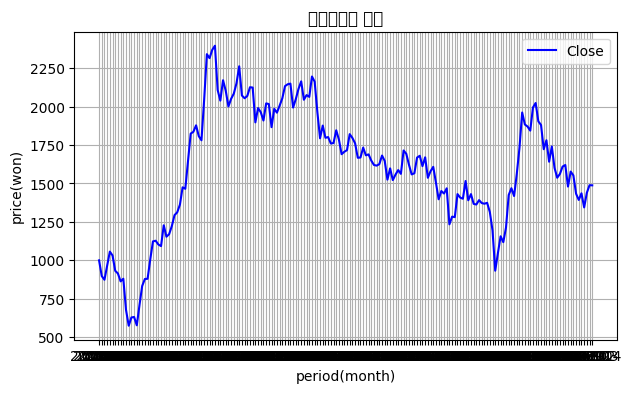

In [6]:
plt.figure(figsize=(7,4))
plt.title('경기소비재 종가')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
plt.plot(df['종가'], label = 'Close', color='b')
plt.legend(loc='best')
plt.show()

In [7]:
df.drop(['유가','은','원위안','외환보유액'],axis=1,inplace=True)

In [8]:
df.shape

(184, 18)

In [9]:
df.isna().sum()

재고순환지표     0
경제심리지수     0
기계류내수출     0
건설수주액      0
수출입물가비율    0
코스피        0
장단기        0
뉴스심리지수     0
원달러        0
원엔         0
CD         0
G20        0
미장단기       0
거래량        0
구리         0
천연가스       0
금          0
종가         0
dtype: int64

In [10]:
df.describe()

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,뉴스심리지수,원달러,원엔,CD,G20,미장단기,거래량,구리,천연가스,금,종가
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,-2.878804,98.221196,104.084783,10623.159239,93.974457,2083.170652,0.804511,99.451141,1147.403641,11.204259,2.376630,99.676375,1.294130,13155.097826,3.170654,3.902791,1390.829348,1596.721957
std,8.441417,9.709723,7.551556,3235.475727,6.470813,411.051564,0.756145,10.366991,88.073532,1.726068,1.197858,1.520516,0.887853,7536.639375,0.716308,1.911011,304.309178,400.347191
min,-24.900000,64.300000,85.300000,5352.400000,83.600000,1115.100000,-0.250000,60.040000,936.800000,8.549600,0.630000,89.734220,-0.880000,5423.000000,1.431000,1.587000,726.800000,575.080000
25%,-7.225000,94.825000,99.225000,7698.500000,87.775000,1915.850000,0.260000,94.275000,1101.675000,9.956525,1.527500,99.405895,0.580000,8622.750000,2.689875,2.752500,1205.075000,1373.550000
50%,-4.500000,97.750000,102.150000,10493.050000,94.250000,2011.250000,0.645000,100.775000,1128.380000,10.572600,2.135000,100.037850,1.340000,10509.000000,3.121250,3.509000,1314.650000,1619.840000
75%,0.450000,104.575000,111.475000,13262.775000,99.625000,2295.300000,1.095000,105.727500,1185.875000,12.737650,2.880000,100.498600,1.935000,15230.500000,3.598375,4.350750,1672.875000,1886.657500
max,31.300000,115.900000,119.600000,17969.600000,107.600000,3232.100000,2.900000,119.420000,1570.200000,16.151500,5.970000,101.558900,2.870000,53655.000000,4.688500,13.505000,1986.300000,2395.140000


In [11]:
dataset=df.values
scaler=StandardScaler()
dataset= scaler.fit_transform(dataset)
print(dataset)

[[ 0.93589755  1.43327182 -0.74157178 ...  2.07114449 -1.74913464
  -1.49457805]
 [ 0.80523213  1.42294476 -0.75485022 ...  2.01342627 -1.57284691
  -1.75012721]
 [ 0.7220814   1.26803893 -0.75485022 ...  2.85611229 -1.33988349
  -1.81061445]
 ...
 [-1.58238152 -0.73540982  0.37381684 ... -0.75285063  1.76937084
  -0.3938106 ]
 [-1.61801754 -0.73540982 -0.40961088 ... -0.59701144  1.4817088
  -0.27075728]
 [-1.66553224 -0.61148516 -0.3432187  ... -0.94751845  1.95422583
  -0.27316174]]


In [12]:
scaled_df = pd.DataFrame(dataset, columns=df.columns)

In [13]:
scaled_df

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,뉴스심리지수,원달러,원엔,CD,G20,미장단기,거래량,구리,천연가스,금,종가
0,0.935898,1.433272,-0.741572,-0.073872,1.724034,-0.559776,-0.178376,-0.088129,-2.397750,-1.542177,2.899191,1.241461,-0.298305,-0.213820,-0.149300,2.071144,-1.749135,-1.494578
1,0.805232,1.422945,-0.754850,-0.426774,1.507087,-0.751027,-0.364031,-0.151966,-2.314638,-1.363482,2.581093,1.062020,0.266388,0.054403,0.143270,2.013426,-1.572847,-1.750127
2,0.722081,1.268039,-0.754850,-0.368417,1.274645,-0.956670,-0.655774,-1.095984,-2.285037,-1.182231,2.338333,0.855937,0.718142,-0.426695,1.060877,2.856112,-1.339883,-1.810614
3,0.389479,1.154441,-0.688458,-0.155411,1.042202,-0.920567,-0.881212,0.413865,-1.866064,-0.898330,2.522495,0.610022,0.537440,0.107622,0.890094,3.054453,-1.657531,-1.580287
4,0.151905,0.813648,-0.741572,-0.206888,0.716782,-0.792741,-0.775124,-0.618172,-1.574605,-0.896471,2.497382,0.309174,0.130861,0.470309,0.733310,3.493636,-1.779120,-1.352464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.893418,-0.570177,1.502484,-0.016940,-1.359705,0.617733,0.047062,-1.553485,1.785261,-0.910239,1.384038,-0.488753,-2.274730,-0.631189,0.905493,1.487666,1.398343,-0.403203
180,-1.487352,-0.756064,0.944790,1.037149,-1.375201,0.725068,-0.470119,-0.547564,1.384618,-0.870968,1.342183,-0.464920,-2.150497,-0.354983,0.874346,0.194515,1.466222,-0.633205
181,-1.582382,-0.735410,0.373817,1.271416,-1.452682,0.751658,-0.828168,-0.190655,0.846784,-1.002839,1.015713,-0.429837,-2.252142,-0.455433,1.316351,-0.752851,1.769371,-0.393811
182,-1.618018,-0.735410,-0.409611,1.105393,-1.483675,0.797519,-0.974040,-0.510809,1.861996,-0.941377,1.032455,-0.392498,-2.455431,0.228163,1.267356,-0.597011,1.481709,-0.270757


In [14]:
scaled_df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가'],
      dtype='object')

In [15]:
feature_df = scaled_df[['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','종가']]
label_df = scaled_df['종가']

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

In [16]:
def make_sequence_dataset(feature, label, window_size):
  feature_list = []
  label_list = []

  for i in range(len(feature)-window_size): # 만약 feature개수가 6이라면 range(4)
    feature_list.append(feature[i:i+window_size]) # 0:2
    label_list.append(label[i+window_size])
  return np.array(feature_list), np.array(label_list) # 3차원 텐서

In [17]:
window_size=1
X, Y = make_sequence_dataset(feature_np, label_np, window_size) # batchsize, time steps ,input dims

In [18]:
print(X.shape, Y.shape)

(183, 1, 9) (183,)


In [ ]:
# def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
#     data = []
#     labels = []

#     start_index = start_index + history_size
#     if end_index is None:
#         end_index = len(dataset) - target_size

#     for i in range(start_index, end_index):
#         indices = range(i - history_size, i, step)
#         data.append(dataset[indices])

#         if single_step:
#             labels.append(target[i + target_size])
#         else:
#             labels.append(target[i:i + target_size])
#     return np.array(data), np.array(labels)



- dataset: 입력으로 사용될 다변량 시계열 데이터. 이는 2D 배열 또는 리스트로 표현됩니다.
- target: 예측하고자 하는 값 또는 시계열 데이터의 특정 특징(feature). 이는 1D 배열 또는 리스트로 표현됩니다.
- start_index: 데이터에서 입력 시퀀스의 시작 인덱스입니다.
- end_index: 데이터에서 입력 시퀀스의 종료 인덱스입니다. 만약 None으로 설정되면, 데이터의 끝에서 target_size를 뺀 값으로 설정됩니다.
- history_size: 입력으로 사용할 이전 시점들의 크기입니다. 이 값은 현재 시점을 포함하지 않습니다.
- target_size: 예측하고자 하는 미래 시점들의 크기입니다.
- step: 입력 시퀀스를 만들기 위해 사용할 간격(step)입니다.
- single_step: 예측할 시계열 데이터가 단일 시점인지 여부를 나타냅니다. 기본값은 False이며, 다변량 시계열을 예측하는 경우 False로 설정되어야 합니다.

In [ ]:
split = -36
x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(146, 2, 9) (146,)
(36, 2, 9) (36,)


In [ ]:
x_train[0].shape

(2, 9)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.utils import get_custom_objects
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.models import load_model
# from sklearn.metrics import mean_squared_error

# def prelu_activation(x):
#     alpha = tf.constant(0.1)  # P-ReLU 매개변수
#     return tf.keras.activations.relu(x) - alpha * tf.keras.activations.relu(-x)

# get_custom_objects().update({'prelu_activation': prelu_activation})


# def e_relu_activation(x):
#     alpha = tf.constant(1.0)  # e-ReLU 매개변수
#     return tf.keras.activations.relu(x) - alpha * (tf.exp(x) - 1)

# get_custom_objects().update({'e_relu_activation': e_relu_activation})


# # LSTM 모델 생성
# from keras.layers import Bidirectional

# model = Sequential()
# model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.18,recurrent_dropout =0.15,activation='e_relu_activation'), input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.18, recurrent_dropout=0.15,activation='tanh')))
# model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.18, recurrent_dropout=0.15,activation='e_relu_activation')))
# model.add(Dense(1, activation='linear'))
# model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import get_custom_objects
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import mean_squared_error
# LSTM 모델 생성
from keras.layers import Bidirectional

def e_relu_activation(x):
    alpha = tf.constant(1.0)  # e-ReLU 매개변수
    return tf.keras.activations.relu(x) - alpha * (tf.exp(x) - 1)

get_custom_objects().update({'e_relu_activation': e_relu_activation})

In [ ]:
def LSTM_epoch_100(x_train,y_train, layer, unit, x_test, y_test):
  #tf.random.set_seed(2022)
  initializer = tf.keras.initializers.GlorotUniform(seed=42)
  #early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, baseline=0.9)
  #check_point = ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)
  def e_relu_activation(x):
    alpha = tf.constant(1.0)  # e-ReLU 매개변수
    return tf.keras.activations.relu(x) - alpha * (tf.exp(x) - 1)

  get_custom_objects().update({'e_relu_activation': e_relu_activation})

  model = Sequential()
  model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.18,recurrent_dropout =0.15,activation='e_relu_activation', kernel_initializer=initializer), input_shape=(x_train.shape[1], x_train.shape[2])))
  for i in range(layer):
      model.add(Bidirectional(LSTM(unit, return_sequences=True, dropout=0.18, recurrent_dropout=0.15,activation='tanh', kernel_initializer=initializer)))
  model.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.18, recurrent_dropout=0.15,activation='e_relu_activation', kernel_initializer=initializer)))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  model.summary()

  model.fit(x_train, y_train, epochs=130, batch_size=6, validation_data=(x_test, y_test), verbose=1)
  #best_model = load_model('best_model.h5')
  return model

list1 = [64, 128, 256]
list2 = []
for i in range(1,2):
    for j in list1:
        LSTM_model = LSTM_epoch_100(x_train, y_train, i, j,x_test,y_test)
        val_predict = LSTM_model.predict(x_test)
        # 역 변환기
        scaler_y = StandardScaler()
        scaled_data_y = scaler_y.fit_transform(df.iloc[:, -1].values.reshape(-1,1))

        # 예측 값 스케일 역변환
        val_predict = scaler_y.inverse_transform(val_predict)

        # y_train = scaler_y.inverse_transform(y_train.reshape(-1,1))
        y_test_re = scaler_y.inverse_transform(y_test.reshape(-1,1))

        bin_pred = tf.round(val_predict).numpy().flatten()
        mse = mean_squared_error(val_predict[2:], y_test_re[2:])
        rmse = np.sqrt(mse)
        print(rmse)
        list2.append([i, j, mean_squared_error(y_test_re[2:], bin_pred[2:])])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 2, 512)           544768    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 2, 128)           295424    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,103,617
Trainable params: 1,103,617
Non-trainable params: 0
______________________________________________

217.39999598115284


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 2, 512)           544768    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 2, 256)           656384    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,595,649
Trainable params: 1,595,649
Non-trainable params: 0
____________________________________________

230.1958208268882


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 2, 512)           544768    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 2, 512)           1574912   
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,776,321
Trainable params: 2,776,321
Non-trainable params: 0
____________________________________________

In [ ]:
list2

[[1, 64, 47262.79759411765],
 [1, 128, 52983.27053529413],
 [1, 256, 63044.56994705883]]

In [ ]:
list1 = [64, 128, 256]
list2 = []
for i in range(1,5):
    for j in list1:
        LSTM_model = LSTM_epoch_100(x_train, y_train, i, j,x_test,y_test)
        pred = LSTM_model.predict(x_test)
        bin_pred = tf.round(pred).numpy().flatten()
        list2.append([i, j, mean_squared_error(y_test[2:], bin_pred[2:])])

TypeError: ignored

In [ ]:
# model = Sequential()
# model.add(LSTM(128,activation='tanh',input_shape=x_train[0].shape)) # LSTM계층에 tanh를 활성화 함수로 가지는 노드 수 128개
# model.add(Dense(1, activation='linear'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               74752     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# early_stop = EarlyStopping(monitor='vall_loss', patience=5)
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=30, batch_size=16, verbose=1, callbacks=[early_stop])

Epoch 1/30
 1/10 [==>...........................] - ETA: 16s - loss: 1.0808 - mae: 0.8171

10/10 [==============================] - 2s 48ms/step - loss: 0.6723 - mae: 0.6706 - val_loss: 0.1814 - val_mae: 0.3398
Epoch 2/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.2484 - mae: 0.4362

10/10 [==============================] - 0s 7ms/step - loss: 0.2213 - mae: 0.3922 - val_loss: 0.1087 - val_mae: 0.2662
Epoch 3/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.1271 - mae: 0.3131

10/10 [==============================] - 0s 6ms/step - loss: 0.1444 - mae: 0.3158 - val_loss: 0.1372 - val_mae: 0.2994
Epoch 4/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.1101 - mae: 0.2602

10/10 [==============================] - 0s 6ms/step - loss: 0.1016 - mae: 0.2585 - val_loss: 0.2099 - val_mae: 0.3880
Epoch 5/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.1322 - mae: 0.2981

10/10 [==============================] - 0s 6ms/step - loss: 0.0816 - mae: 0.2266 - val_loss: 0.2835 - val_mae: 0.4580
Epoch 6/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0739 - mae: 0.2099

10/10 [==============================] - 0s 6ms/step - loss: 0.0708 - mae: 0.2059 - val_loss: 0.3008 - val_mae: 0.4759
Epoch 7/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0320 - mae: 0.1392

10/10 [==============================] - 0s 7ms/step - loss: 0.0592 - mae: 0.1869 - val_loss: 0.3467 - val_mae: 0.5147
Epoch 8/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0230 - mae: 0.1199

10/10 [==============================] - 0s 6ms/step - loss: 0.0602 - mae: 0.1930 - val_loss: 0.3784 - val_mae: 0.5378
Epoch 9/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0822 - mae: 0.2048

10/10 [==============================] - 0s 5ms/step - loss: 0.0544 - mae: 0.1827 - val_loss: 0.3770 - val_mae: 0.5383
Epoch 10/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0561 - mae: 0.1725

10/10 [==============================] - 0s 7ms/step - loss: 0.0490 - mae: 0.1695 - val_loss: 0.4297 - val_mae: 0.5788
Epoch 11/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0340 - mae: 0.1458

10/10 [==============================] - 0s 8ms/step - loss: 0.0459 - mae: 0.1643 - val_loss: 0.4650 - val_mae: 0.6042
Epoch 12/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0331 - mae: 0.1437

10/10 [==============================] - 0s 7ms/step - loss: 0.0435 - mae: 0.1605 - val_loss: 0.4958 - val_mae: 0.6277
Epoch 13/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0425 - mae: 0.1738

10/10 [==============================] - 0s 7ms/step - loss: 0.0417 - mae: 0.1593 - val_loss: 0.4790 - val_mae: 0.6162
Epoch 14/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0392 - mae: 0.1622

10/10 [==============================] - 0s 6ms/step - loss: 0.0401 - mae: 0.1542 - val_loss: 0.4746 - val_mae: 0.6119
Epoch 15/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0162 - mae: 0.0921

10/10 [==============================] - 0s 6ms/step - loss: 0.0387 - mae: 0.1511 - val_loss: 0.4736 - val_mae: 0.6089
Epoch 16/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0459 - mae: 0.1611

10/10 [==============================] - 0s 5ms/step - loss: 0.0371 - mae: 0.1478 - val_loss: 0.4697 - val_mae: 0.6075
Epoch 17/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0389 - mae: 0.1535

10/10 [==============================] - 0s 6ms/step - loss: 0.0365 - mae: 0.1465 - val_loss: 0.4632 - val_mae: 0.6005
Epoch 18/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0323 - mae: 0.1370

10/10 [==============================] - 0s 6ms/step - loss: 0.0355 - mae: 0.1448 - val_loss: 0.4589 - val_mae: 0.5957
Epoch 19/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0259 - mae: 0.1304

10/10 [==============================] - 0s 8ms/step - loss: 0.0373 - mae: 0.1466 - val_loss: 0.4354 - val_mae: 0.5751
Epoch 20/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0308 - mae: 0.1323

10/10 [==============================] - 0s 8ms/step - loss: 0.0336 - mae: 0.1408 - val_loss: 0.4081 - val_mae: 0.5567
Epoch 21/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0335 - mae: 0.1507

10/10 [==============================] - 0s 5ms/step - loss: 0.0379 - mae: 0.1485 - val_loss: 0.4049 - val_mae: 0.5519
Epoch 22/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0330 - mae: 0.1353

10/10 [==============================] - 0s 5ms/step - loss: 0.0318 - mae: 0.1387 - val_loss: 0.4423 - val_mae: 0.5800
Epoch 23/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0566 - mae: 0.1679

10/10 [==============================] - 0s 7ms/step - loss: 0.0333 - mae: 0.1381 - val_loss: 0.4054 - val_mae: 0.5515
Epoch 24/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0204 - mae: 0.1048

10/10 [==============================] - 0s 6ms/step - loss: 0.0310 - mae: 0.1327 - val_loss: 0.4171 - val_mae: 0.5614
Epoch 25/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0420 - mae: 0.1633

10/10 [==============================] - 0s 6ms/step - loss: 0.0307 - mae: 0.1327 - val_loss: 0.4455 - val_mae: 0.5878
Epoch 26/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0272 - mae: 0.1328

10/10 [==============================] - 0s 6ms/step - loss: 0.0304 - mae: 0.1345 - val_loss: 0.4461 - val_mae: 0.5865
Epoch 27/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0388 - mae: 0.1586

10/10 [==============================] - 0s 7ms/step - loss: 0.0305 - mae: 0.1326 - val_loss: 0.4377 - val_mae: 0.5805
Epoch 28/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0390 - mae: 0.1419

10/10 [==============================] - 0s 5ms/step - loss: 0.0304 - mae: 0.1325 - val_loss: 0.4524 - val_mae: 0.5924
Epoch 29/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0208 - mae: 0.1107

10/10 [==============================] - 0s 8ms/step - loss: 0.0293 - mae: 0.1329 - val_loss: 0.4223 - val_mae: 0.5690
Epoch 30/30
 1/10 [==>...........................] - ETA: 0s - loss: 0.0280 - mae: 0.1327

10/10 [==============================] - 0s 5ms/step - loss: 0.0273 - mae: 0.1265 - val_loss: 0.4332 - val_mae: 0.5786


2/2 [==============================] - 0s 4ms/step


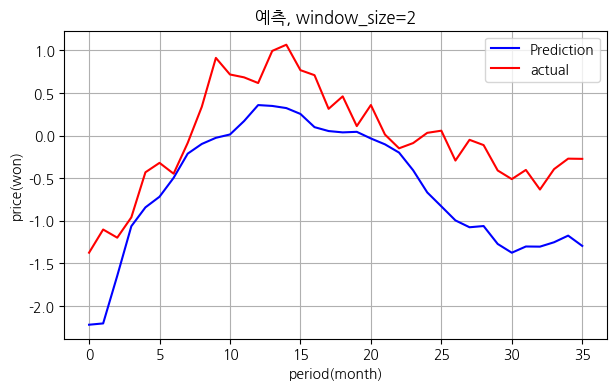

In [ ]:
# 예측
pred = model.predict(x_test)

plt.figure(figsize=(7,4))
plt.title('예측, window_size=2')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
plt.plot(pred, label = 'Prediction', color='b')
plt.plot(y_test, label = 'actual', color='r')
plt.legend(loc='best')
plt.show()

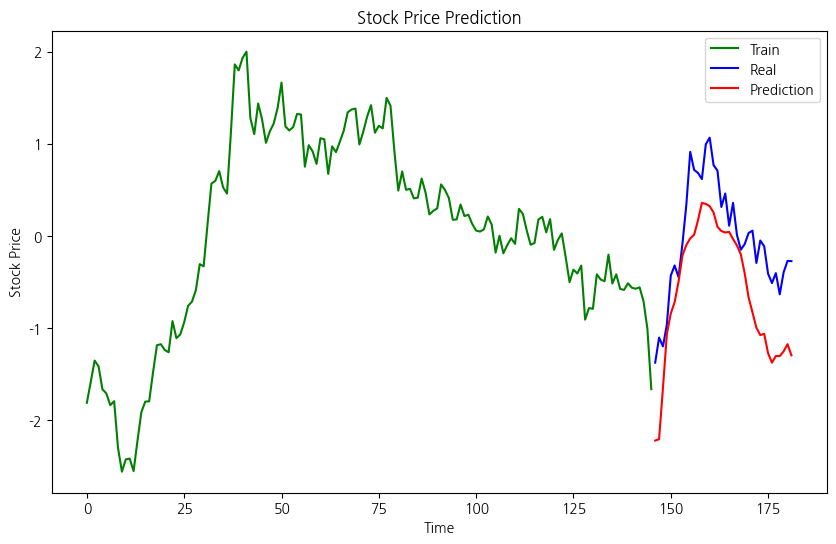

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(y_train, color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, color='blue', label='Real')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), pred, color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

여기까지

In [ ]:
# past_history = 2
# future_target = 1
# STEP = 1

# X_train, y_train = multivariate_data(dataset, dataset[:, -1], 0, 148, past_history,
#                                                    future_target, STEP, single_step=False)
# X_test, y_test = multivariate_data(dataset, dataset[:, -1], 148, None, past_history,
#                                                future_target, STEP, single_step=False)

# print('Single window of past history : {}'.format(X_train[0].shape))

Single window of past history : (2, 22)


In [ ]:
X_train.shape

(146, 2, 22)

In [ ]:
X_test.shape

(33, 2, 22)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.3))
model.add(LSTM(50,dropout=0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)




Epoch 1/200
3/3 [==============================] - 4s 5ms/step - loss: 1.1228
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 1.0529
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 0.9636
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 0.8934
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8200
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 0.7060
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 0.6413
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.5210
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4207
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.3380
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2661
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2200
Epoch 13/200
3/3 [==============================] - 0s 5ms/st

In [ ]:
# 예측
train_predict = model.predict(X_train)
val_predict = model.predict(X_test)

scaler_y = StandardScaler()
scaled_data_y = scaler_y.fit_transform(df.iloc[:, -1].values.reshape(-1,1))
# 예측 값 스케일 역변환
train_predict = scaler_y.inverse_transform(train_predict)
val_predict = scaler_y.inverse_transform(val_predict)

# 실제 값 스케일 역변환
y_train = scaler_y.inverse_transform(y_train.reshape(-1,1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))

2/2 [==============================] - 0s 4ms/step


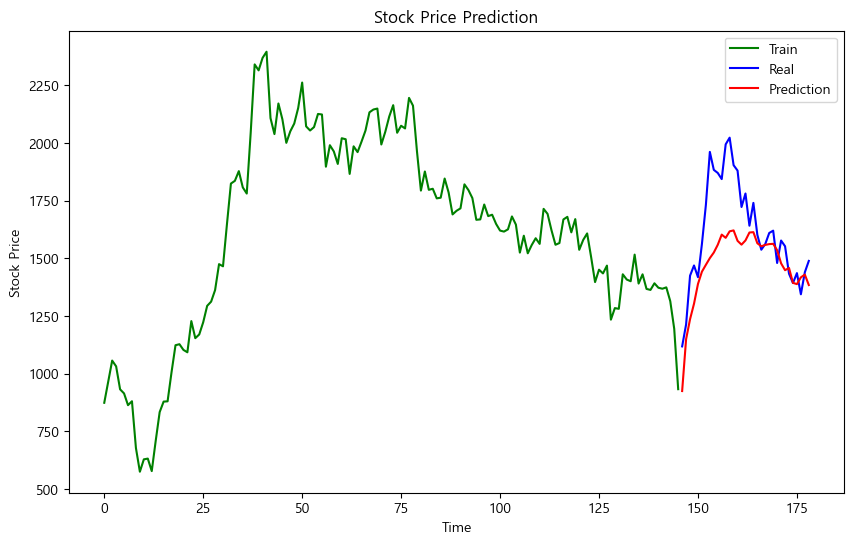

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Add the training set to the plot:
plt.plot(y_train, color='green', label='Train')
# Plot the test and prediction data:
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test, color='blue', label='Real')
plt.plot(range(len(y_train), len(y_train)+len(y_test)), val_predict, color='red', label='Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
